In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Зависимость выживаемости от порта, в котором входил человек.

In [161]:
data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['PassengerId'].nunique()

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

Рассмотрим долю выживших от числа вошедших в каждом из портов. Кажется, что люди, из порта "С" выживают с большей вероятностью.

In [112]:
data.groupby(['Embarked'])['PassengerId'].nunique()/data['PassengerId'].nunique()

Embarked
C    0.188552
Q    0.086420
S    0.722783
Name: PassengerId, dtype: float64

Однако большинство людей вошли в "S" (более 72 %), поэтому искать зависимость от выживаемости от порта видимо не совсем коректно.

### Зависимость выживаемости от типа каюты.

In [158]:
data['Cabin_type'] = data['Cabin'].apply(lambda x: str(x)[0])
data.groupby(['Cabin_type'])['Name'].nunique()

Cabin_type
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
Name: Name, dtype: int64

Видно, что у большинства людей на Титанике каюта осталась неизвестной (687 человек)

In [159]:
data.groupby(['Cabin_type'])['Survived'].mean()

Cabin_type
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

Лучшая выживаемость была в каютах D, E, B типов, вероятно это связано с их расположением.

### Зависимость выживаемости от пола, возраста и класса

In [80]:
data.groupby(['Sex', 'Pclass', pd.cut(data.Age, 10)])['Survived'].mean()

Sex     Pclass  Age             
female  1       (0.34, 8.378]       0.000000
                (8.378, 16.336]     1.000000
                (16.336, 24.294]    1.000000
                (24.294, 32.252]    0.909091
                (32.252, 40.21]     1.000000
                (40.21, 48.168]     1.000000
                (48.168, 56.126]    0.909091
                (56.126, 64.084]    1.000000
                (64.084, 72.042]         NaN
                (72.042, 80.0]           NaN
        2       (0.34, 8.378]       1.000000
                (8.378, 16.336]     1.000000
                (16.336, 24.294]    0.941176
                (24.294, 32.252]    0.894737
                (32.252, 40.21]     0.933333
                (40.21, 48.168]     0.857143
                (48.168, 56.126]    1.000000
                (56.126, 64.084]    0.000000
                (64.084, 72.042]         NaN
                (72.042, 80.0]           NaN
        3       (0.34, 8.378]       0.647059
                (8.378

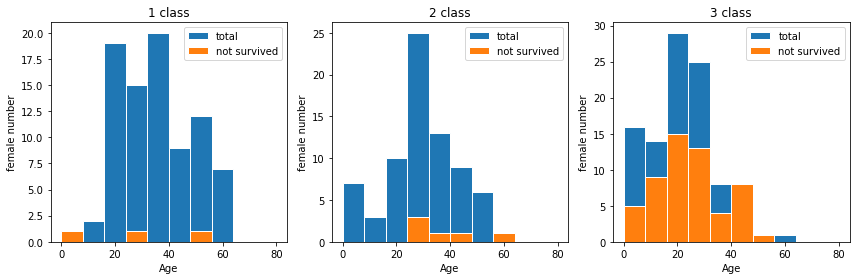

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

pclass = 1
for ax in axes:
    ax.hist(data[(data.Sex == 'female') & (data.Pclass == pclass)].Age, range=(0, 80), edgecolor='white', label='total')
    ax.hist(data[(data.Sex == 'female') & (data.Pclass == pclass) & (data.Survived == 0)].Age,
            range=(0, 80), edgecolor='white', label='not survived')
    
    ax.set_xlabel('Age')
    ax.set_ylabel('female number')
    ax.set_title(str(pclass)+' '+'class' )
    ax.legend(loc='upper right')
    pclass += 1
    

plt.tight_layout()


Видим, что фактически независимо от возраста вероятность выжить у женщин в первых двух классах очень высокая (более 83% для любого возраста). Вцелом выживаемость в третьем классе для женцин значительно хуже, чем в первых двух.Заметим, что в возрасте до 9 лет выживаемость лучше (доля выживших > 64%), чем для женщин в 3 классе вцелом.

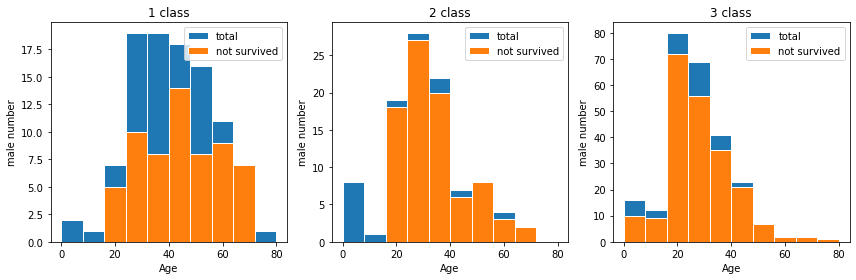

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

pclass = 1
for ax in axes:
    ax.hist(data[(data.Sex == 'male') & (data.Pclass == pclass)].Age, range=(0, 80), edgecolor='white', label='total')
    ax.hist(data[(data.Sex == 'male') & (data.Pclass == pclass) & (data.Survived == 0)].Age,
            range=(0, 80), edgecolor='white', label='not survived')
    
    ax.set_xlabel('Age')
    ax.set_ylabel('male number')
    ax.set_title(str(pclass)+' '+'class' )
    ax.legend(loc='upper right')
    pclass += 1
    

plt.tight_layout()

Видим очень низкую выживаемость для 2 и 3 класса фактически не зависимо от возраста.В 1 классе для мужчин ситуация получше(лучшая возрастная категория для выживания 24-41, доля выживших для них чуть более 50 %)


Итог: в самом лучем положениии - женщины 16-24 в 1 либо 2 классе